In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import random
plt.style.use('ggplot')

In [2]:
#Dataset from https://www.kaggle.com/mathurinache/world-happiness-report/notebooks
dfhappiness2015 = pd.read_csv('https://raw.githubusercontent.com/andreanstev/BedahData/main/World%20Happiness%20Report%202015-2020/2015.csv')
dfhappiness2016 = pd.read_csv('https://raw.githubusercontent.com/andreanstev/BedahData/main/World%20Happiness%20Report%202015-2020/2016.csv')
dfhappiness2017 = pd.read_csv('https://raw.githubusercontent.com/andreanstev/BedahData/main/World%20Happiness%20Report%202015-2020/2017.csv')
dfhappiness2018 = pd.read_csv('https://raw.githubusercontent.com/andreanstev/BedahData/main/World%20Happiness%20Report%202015-2020/2018.csv')
dfhappiness2019 = pd.read_csv('https://raw.githubusercontent.com/andreanstev/BedahData/main/World%20Happiness%20Report%202015-2020/2019.csv')
dfhappiness2020 = pd.read_csv('https://raw.githubusercontent.com/andreanstev/BedahData/main/World%20Happiness%20Report%202015-2020/2020.csv')

In [ ]:
print(dfhappiness2015.isnull().any())
print(dfhappiness2016.isnull().any())
print(dfhappiness2017.isnull().any())
print(dfhappiness2018.isnull().any())
print(dfhappiness2019.isnull().any())
print(dfhappiness2020.isnull().any())

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool
Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Lower Confidence Interval        False
Upper Confidence Interval        False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool
C

In [ ]:
print(dfhappiness2015.columns)
print(dfhappiness2016.columns)
print(dfhappiness2017.columns)
print(dfhappiness2018.columns)
print(dfhappiness2019.columns)
print(dfhappiness2020.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

In [4]:
dfhappiness2017 = dfhappiness2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})

dfhappiness2018 = dfhappiness2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})

dfhappiness2019 = dfhappiness2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'Trust (Government Corruption)'})

dfhappiness2020['Happiness Rank'] =  range(1, len(dfhappiness2020.index)+1)
dfhappiness2020 = dfhappiness2020.drop('Generosity',axis=1)
dfhappiness2020 = dfhappiness2020.rename(columns = {'Country name' : 'Country', 'Ladder score' : 'Happiness Score', 
                                      'Explained by: Log GDP per capita' : 'Economy (GDP per Capita)', 'Explained by: Social support' : 'Family', 'Explained by: Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Explained by: Freedom to make life choices' : 'Freedom', 'Explained by: Perceptions of corruption' : 'Trust (Government Corruption)','Explained by: Generosity':'Generosity'})
dfhappiness2015['Year'] = 2015
dfhappiness2016['Year'] = 2016
dfhappiness2017['Year'] = 2017
dfhappiness2018['Year'] = 2018
dfhappiness2019['Year'] = 2019
dfhappiness2020['Year'] = 2020

In [ ]:
dfhappiness = pd.DataFrame(columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year'])
n = [dfhappiness2015, dfhappiness2016, dfhappiness2017, dfhappiness2018, dfhappiness2019, dfhappiness2020]
for i in n:
    dfhappiness = dfhappiness.append(i[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year']], ignore_index = 'True')

In [ ]:
#Buat tabel happiness score tiap country dari tahun 2015 sampai 2020
pd.set_option('display.max_rows', 1000)
dfhappiness_by_year = pd.pivot_table(dfhappiness, values='Happiness Score', index='Country', columns='Year').T

In [ ]:
null_index = dfhappiness_by_year.isnull().any()

In [ ]:
null_index = null_index[null_index==True].index

In [ ]:
null_index

Index(['Angola', 'Belize', 'Bhutan', 'Central African Republic', 'Comoros',
       'Djibouti', 'Gambia', 'Hong Kong', 'Hong Kong S.A.R. of China',
       'Hong Kong S.A.R., China', 'Laos', 'Lesotho', 'Macedonia', 'Maldives',
       'Mozambique', 'Namibia', 'North Cyprus', 'North Macedonia',
       'Northern Cyprus', 'Oman', 'Puerto Rico', 'Qatar', 'Somalia',
       'Somaliland Region', 'Somaliland region', 'South Sudan', 'Sudan',
       'Suriname', 'Swaziland', 'Syria', 'Taiwan', 'Taiwan Province of China',
       'Trinidad & Tobago', 'Trinidad and Tobago'],
      dtype='object', name='Country')

In [ ]:
dfhappiness_by_year[null_index]

Country,Angola,Belize,Bhutan,Central African Republic,Comoros,Djibouti,Gambia,Hong Kong,Hong Kong S.A.R. of China,"Hong Kong S.A.R., China",...,Somaliland region,South Sudan,Sudan,Suriname,Swaziland,Syria,Taiwan,Taiwan Province of China,Trinidad & Tobago,Trinidad and Tobago
Year,,,,,,,,,,,,,,,,,,,,,
2015,4.033,NaN,5.253,3.6780,3.9560,4.369,NaN,5.474,NaN,NaN,...,5.057,NaN,4.550,6.269,4.8670,3.006,6.298,NaN,NaN,6.1680
2016,3.866,5.956,5.196,NaN,3.9560,NaN,NaN,5.458,NaN,NaN,...,NaN,3.8320,4.139,6.269,NaN,3.069,6.379,NaN,NaN,6.1680
2017,3.795,5.956,5.011,2.6930,NaN,NaN,NaN,NaN,NaN,5.472,...,NaN,3.5910,4.139,NaN,NaN,3.462,NaN,6.4220,NaN,6.1680
2018,3.795,5.956,5.082,3.0830,NaN,NaN,NaN,5.430,NaN,NaN,...,NaN,3.2540,4.139,NaN,NaN,3.462,6.441,NaN,6.192,NaN
2019,NaN,NaN,5.082,3.0830,3.9730,NaN,4.5160,5.430,NaN,NaN,...,NaN,2.8530,NaN,NaN,4.2120,3.462,6.446,NaN,6.192,NaN
2020,NaN,NaN,NaN,3.4759,4.2886,NaN,4.7506,NaN,5.5104,NaN,...,NaN,2.8166,NaN,NaN,4.3081,NaN,NaN,6.4554,NaN,6.1919


In [ ]:
#Untuk negara yang jumlah nullnya diatas tiga di drop, sisanya di inputasi dengan mean
for i in null_index:
    if dfhappiness_by_year[i].isnull().sum() > 3:
        dfhappiness_by_year.drop([i], axis = 1, inplace=True)
    else:
        dfhappiness_by_year[i].fillna(dfhappiness_by_year[i].mean(),inplace=True)

In [ ]:
null_index2 = dfhappiness_by_year.isnull().any()
null_index2 = null_index2[null_index2==True].index
null_index2

Index([], dtype='object', name='Country')

In [ ]:
dfhappiness_by_year = dfhappiness_by_year.T

Pertanyaan 1: Apakah dalam tahun 2015 hingga 2020 terdapat perubahan Index of Happiness dari tiap negara?

Agar pertanyaan lebih mudah dijawab, setiap negara dikelompokkan ke dalam regional dan divisualisasikan.

In [ ]:
region = dfhappiness2020[['Country','Regional indicator']].set_index('Country')

In [ ]:
#Tambahkan regional ke dataset
dfhappiness_by_year = pd.concat([dfhappiness_by_year,region],axis=1)

In [ ]:
dfhappiness_by_year = dfhappiness_by_year[['Regional indicator',2015,2016,2017,2018,2019,2020]]

In [ ]:
dfhappiness_by_year = dfhappiness_by_year.drop(['Taiwan Province of China','Hong Kong S.A.R. of China','Maldives','Gambia'],axis =0)

In [ ]:
#dfhappiness_by_year = dfhappiness_by_year.T.reset_index().set_index(['index','Regional indicator'])

In [ ]:
#dfhappiness_by_year.T

In [ ]:
dfhappiness_by_year['Regional indicator'].value_counts()

Sub-Saharan Africa                    38
Latin America and Caribbean           21
Western Europe                        21
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             6
North America and ANZ                  4
East Asia                              4
Name: Regional indicator, dtype: int64

In [ ]:
subsaharan_africa = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='Sub-Saharan Africa'].drop('Regional indicator',axis=1)
western_europe = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='Western Europe'].drop('Regional indicator',axis=1)
latin_america = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='Latin America and Caribbean'].drop('Regional indicator',axis=1)
middle_east_africa = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='Middle East and North Africa'].drop('Regional indicator',axis=1)
central_eastern_europe = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='Central and Eastern Europe'].drop('Regional indicator',axis=1)
independent_states = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='Commonwealth of Independent States'].drop('Regional indicator',axis=1)
southeast_asia = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='Southeast Asia'].drop('Regional indicator',axis=1)
south_asia = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='South Asia'].drop('Regional indicator',axis=1)
east_asia = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='East Asia'].drop('Regional indicator',axis=1)
north_america_anz = dfhappiness_by_year[dfhappiness_by_year['Regional indicator']=='North America and ANZ'].drop('Regional indicator',axis=1)

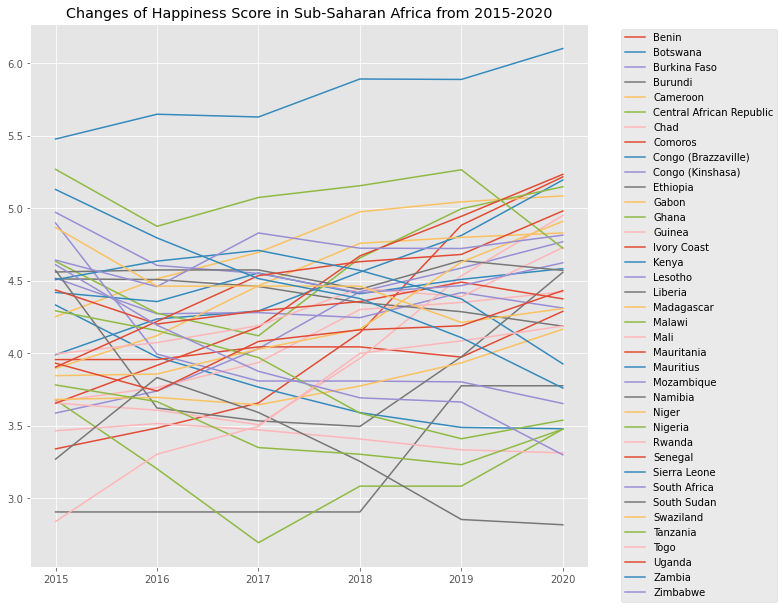

In [ ]:
subsaharan_africa.T.plot(figsize = (10,10), title='Changes of Happiness Score in Sub-Saharan Africa from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
subsaharan_africa['Changes from 2015-2020'] = subsaharan_africa[2020]-subsaharan_africa[2015]
print(subsaharan_africa[subsaharan_africa['Changes from 2015-2020']>1].index)
print(subsaharan_africa[subsaharan_africa['Changes from 2015-2020']<-1].index)

Index(['Benin', 'Burkina Faso', 'Congo (Brazzaville)', 'Guinea', 'Ivory Coast',
       'Niger', 'Senegal', 'Togo'],
      dtype='object')
Index(['Lesotho', 'Zambia', 'Zimbabwe'], dtype='object')


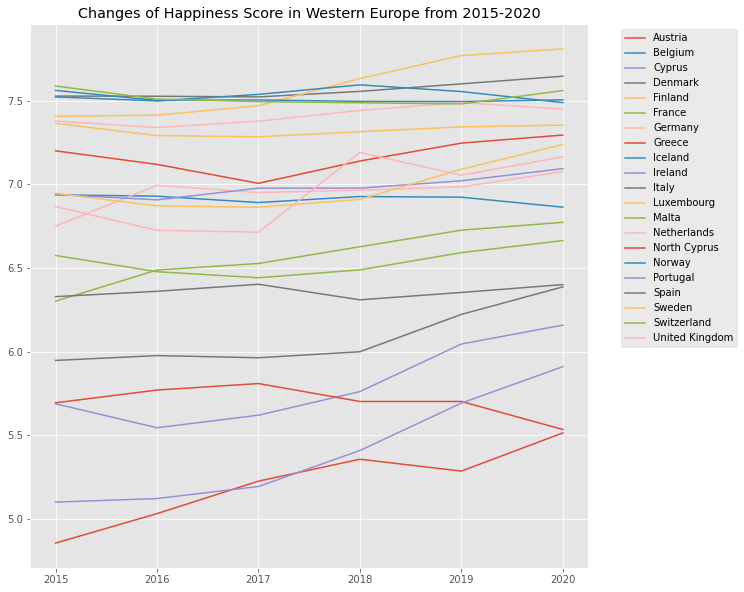

In [ ]:
western_europe.T.plot(figsize = (10,10), title='Changes of Happiness Score in Western Europe from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
western_europe['Changes from 2015-2020'] = western_europe[2020]-western_europe[2015]
print(western_europe[western_europe['Changes from 2015-2020']>1].index)
print(western_europe[western_europe['Changes from 2015-2020']<-1].index)

Index([], dtype='object')
Index([], dtype='object')


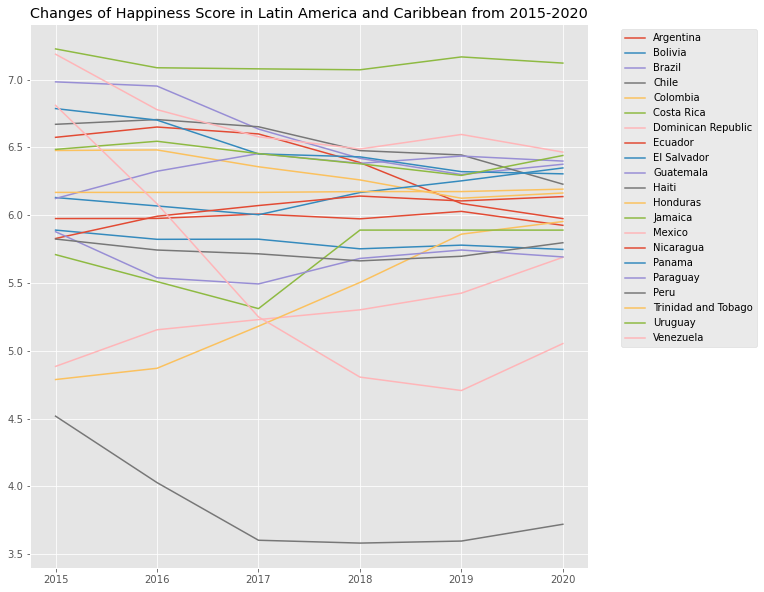

In [ ]:
latin_america.T.plot(figsize = (10,10), title='Changes of Happiness Score in Latin America and Caribbean from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
latin_america['Changes from 2015-2020'] = latin_america[2020]-latin_america[2015]
print(latin_america[latin_america['Changes from 2015-2020']>1].index)
print(latin_america[latin_america['Changes from 2015-2020']<-1].index)

Index(['Honduras'], dtype='object')
Index(['Venezuela'], dtype='object')


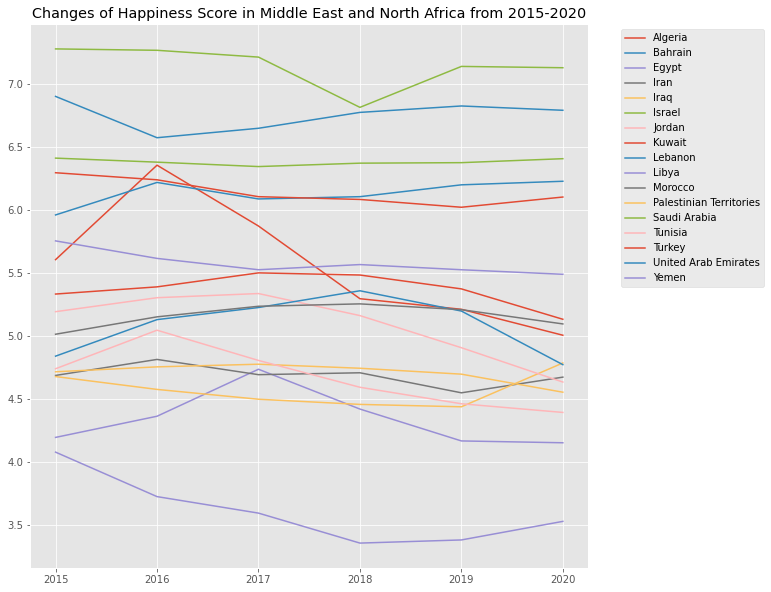

In [ ]:
middle_east_africa.T.plot(figsize = (10,10), title='Changes of Happiness Score in Middle East and North Africa from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
middle_east_africa['Changes from 2015-2020'] = middle_east_africa[2020]-middle_east_africa[2015]
print(middle_east_africa[middle_east_africa['Changes from 2015-2020']>1].index)
print(middle_east_africa[middle_east_africa['Changes from 2015-2020']<-1].index)

Index([], dtype='object')
Index([], dtype='object')


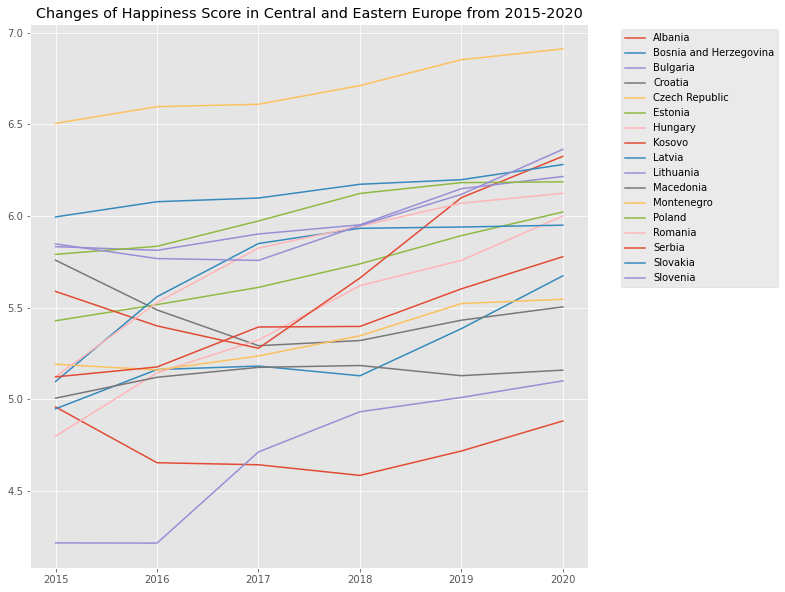

In [ ]:
central_eastern_europe.T.plot(figsize = (10,10), title='Changes of Happiness Score in Central and Eastern Europe from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
central_eastern_europe['Changes from 2015-2020'] = central_eastern_europe[2020]-central_eastern_europe[2015]
print(central_eastern_europe[central_eastern_europe['Changes from 2015-2020']>1].index)
print(central_eastern_europe[central_eastern_europe['Changes from 2015-2020']<-1].index)

Index(['Hungary'], dtype='object')
Index([], dtype='object')


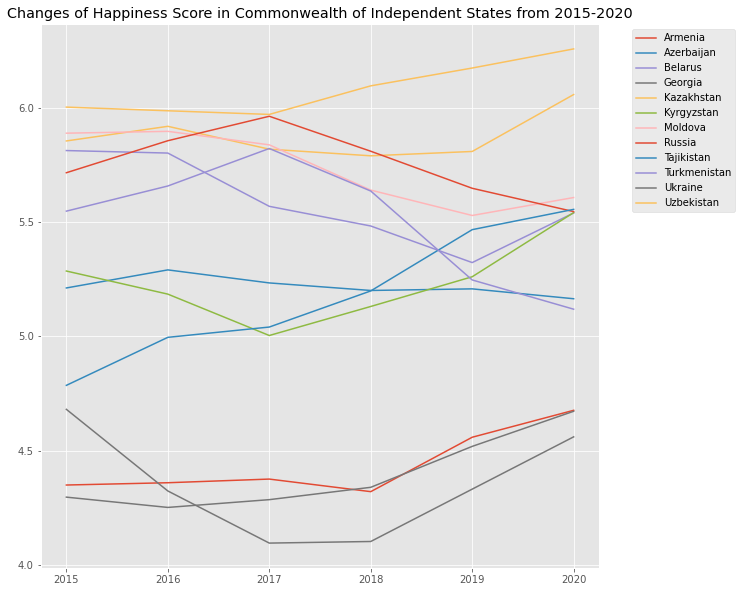

In [ ]:
independent_states.T.plot(figsize = (10,10), title='Changes of Happiness Score in Commonwealth of Independent States from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
independent_states['Changes from 2015-2020'] = independent_states[2020]-independent_states[2015]
print(independent_states[independent_states['Changes from 2015-2020']>1].index)
print(independent_states[independent_states['Changes from 2015-2020']<-1].index)

Index([], dtype='object')
Index([], dtype='object')


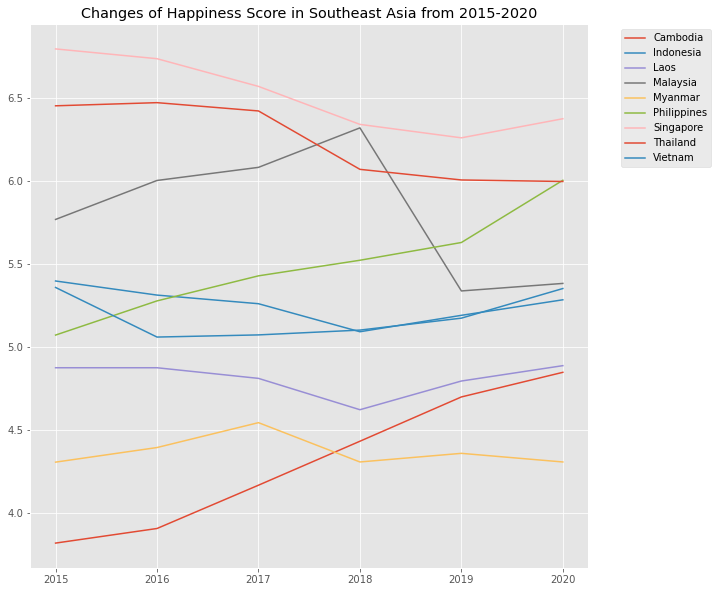

In [ ]:
southeast_asia.T.plot(figsize = (10,10), title='Changes of Happiness Score in Southeast Asia from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
southeast_asia['Changes from 2015-2020'] = southeast_asia[2020]-southeast_asia[2015]
print(southeast_asia[southeast_asia['Changes from 2015-2020']>1].index)
print(southeast_asia[southeast_asia['Changes from 2015-2020']<-1].index)

Index(['Cambodia'], dtype='object')
Index([], dtype='object')


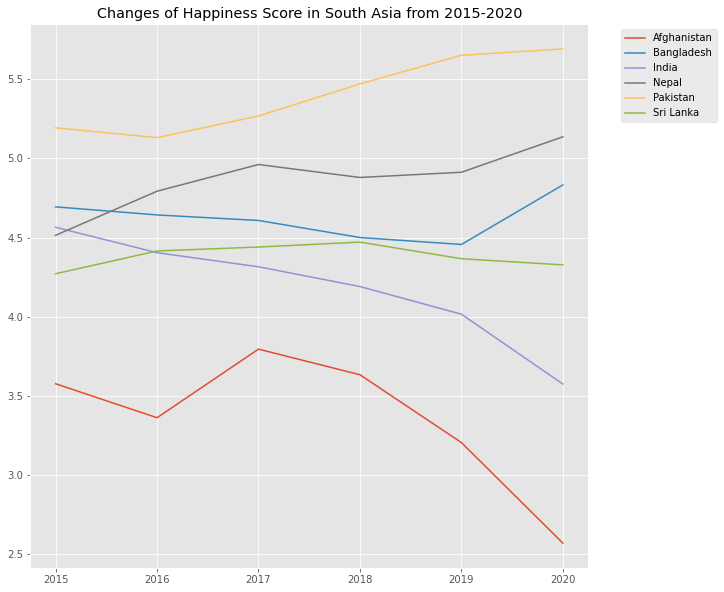

In [ ]:
south_asia.T.plot(figsize = (10,10), title='Changes of Happiness Score in South Asia from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
south_asia['Changes from 2015-2020'] = south_asia[2020]-south_asia[2015]
print(south_asia[south_asia['Changes from 2015-2020']>1].index)
print(south_asia[south_asia['Changes from 2015-2020']<-1].index)

Index([], dtype='object')
Index(['Afghanistan'], dtype='object')


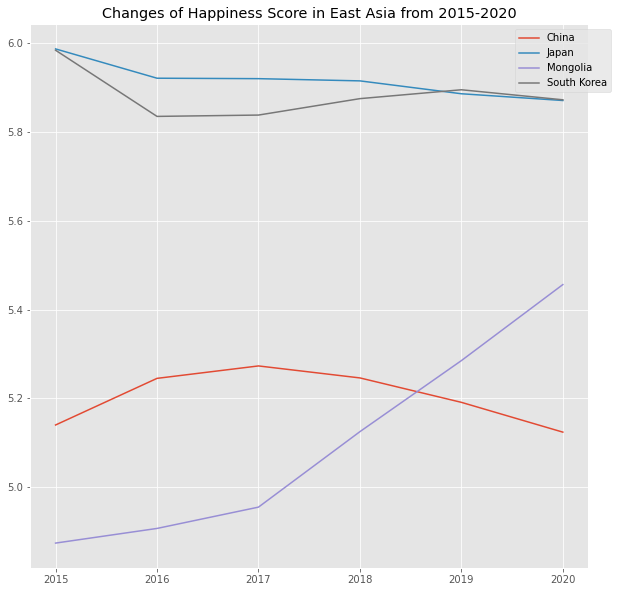

In [ ]:
east_asia.T.plot(figsize = (10,10), title='Changes of Happiness Score in East Asia from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
east_asia['Changes from 2015-2020'] = east_asia[2020]-east_asia[2015]
print(east_asia[east_asia['Changes from 2015-2020']>1].index)
print(east_asia[east_asia['Changes from 2015-2020']<-1].index)

Index([], dtype='object')
Index([], dtype='object')


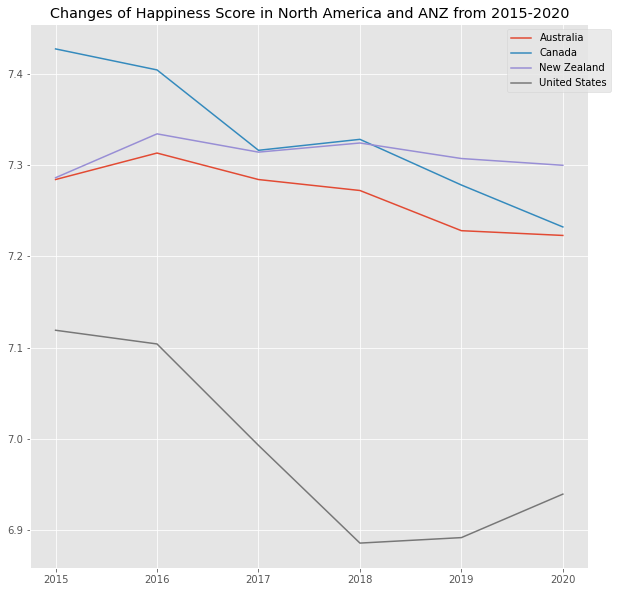

In [ ]:
north_america_anz.T.plot(figsize = (10,10), title='Changes of Happiness Score in North America and ANZ from 2015-2020')
plt.legend(bbox_to_anchor=(1.05, 1))

In [ ]:
north_america_anz['Changes from 2015-2020'] = north_america_anz[2020]-north_america_anz[2015]
print(north_america_anz[north_america_anz['Changes from 2015-2020']>1].index)
print(north_america_anz[north_america_anz['Changes from 2015-2020']<-1].index)

Index([], dtype='object')
Index([], dtype='object')


In [ ]:
#Negara-negara yang diambil adalah yang perubahannya signifikan (selisih index of happiness 2015-2020 lebih dari 1)
happiness_up = ['Benin', 'Burkina Faso', 'Congo (Brazzaville)', 'Guinea', 'Ivory Coast','Niger', 'Senegal', 'Togo', 'Honduras', 'Hungary', 'Cambodia']
happiness_down = ['Lesotho', 'Zambia', 'Zimbabwe', 'Venezuela', 'Afghanistan']

In [ ]:
for i in happiness_up:
    print(dfhappiness[dfhappiness['Country']==i])

    Country Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
154   Benin            155            3.340                  0.286650   
310   Benin            153            3.484                  0.394990   
457   Benin            143            3.657                  0.431085   
605   Benin            136            4.141                  0.378000   
727   Benin            102            4.883                  0.393000   
867   Benin             86            5.216                  0.366245   

       Family  Health (Life Expectancy)   Freedom  \
154  0.353860                  0.319100  0.484500   
310  0.104190                  0.210280  0.397470   
457  0.435300                  0.209930  0.425963   
605  0.372000                  0.240000  0.440000   
727  0.437000                  0.397000  0.349000   
867  0.352428                  0.328063  0.405840   

     Trust (Government Corruption)  Generosity  Year  
154                       0.080100    0.182600  2015  
310   

In [ ]:
for i in happiness_down:
    print(dfhappiness[dfhappiness['Country']==i])

     Country Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
96   Lesotho             97           4.8980                  0.375450   
453  Lesotho            139           3.8080                  0.521021   
610  Lesotho            141           3.8080                  0.472000   
769  Lesotho            144           3.8020                  0.489000   
924  Lesotho            143           3.6528                  0.454939   

       Family  Health (Life Expectancy)   Freedom  \
96   1.041030                  0.076120  0.317670   
453  1.190095                  0.000000  0.390661   
610  1.215000                  0.079000  0.423000   
769  1.169000                  0.168000  0.359000   
924  1.088940                  0.100935  0.409368   

     Trust (Government Corruption)  Generosity  Year  
96                        0.125040    0.163880  2015  
453                       0.119095    0.157497  2017  
610                       0.112000    0.116000  2018  
769             

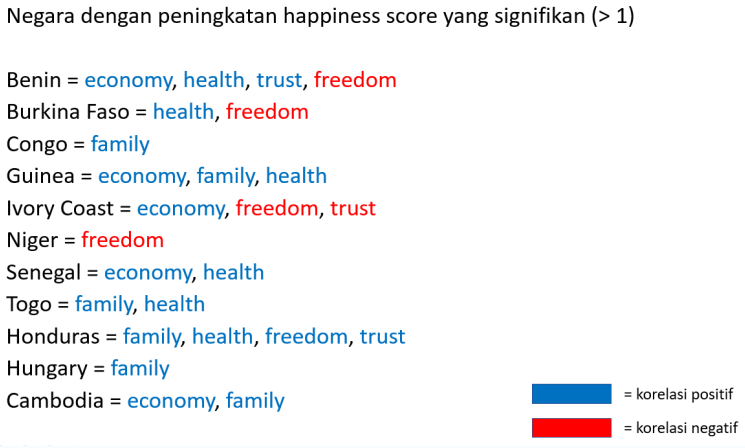

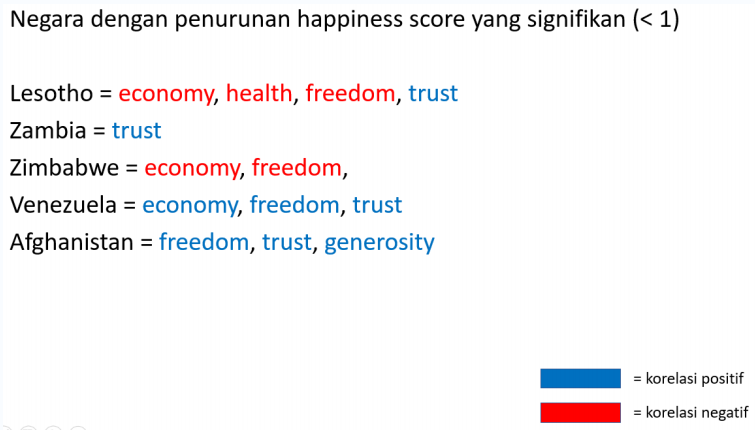

Kesimpulan: faktor yang mempengaruhi happiness score
tidak dapat didefinisikan secara umum, setiap negara
atau wilayah memiliki faktor yang berbeda-beda.

Pertanyaan 2: Apakah ada korelasi antara generosity dengan happiness score?

Text(0.5, 1.0, '2015')

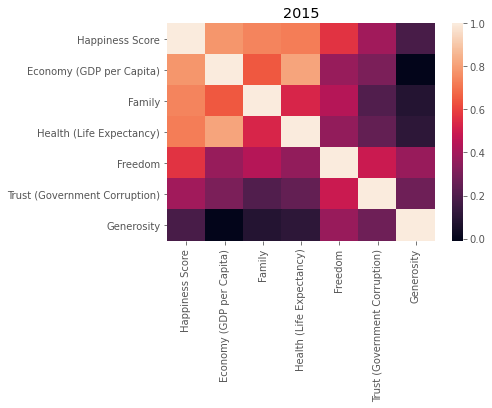

In [ ]:
sns.heatmap(dfhappiness[dfhappiness['Year']==2015].corr())
plt.title('2015')

Text(0.5, 1.0, '2016')

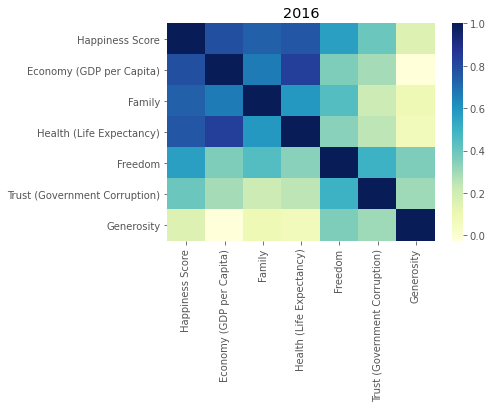

In [ ]:
sns.heatmap(dfhappiness[dfhappiness['Year']==2016].corr(),cmap="YlGnBu")
plt.title('2016')

Text(0.5, 1.0, '2017')

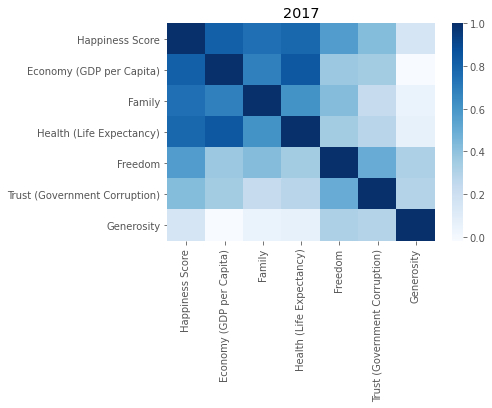

In [ ]:
sns.heatmap(dfhappiness[dfhappiness['Year']==2017].corr(),cmap="Blues")
plt.title('2017')

Text(0.5, 1.0, '2018')

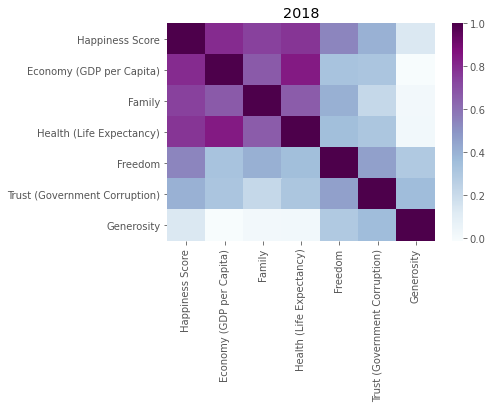

In [ ]:
sns.heatmap(dfhappiness[dfhappiness['Year']==2018].corr(),cmap="BuPu")
plt.title('2018')

Text(0.5, 1.0, '2019')

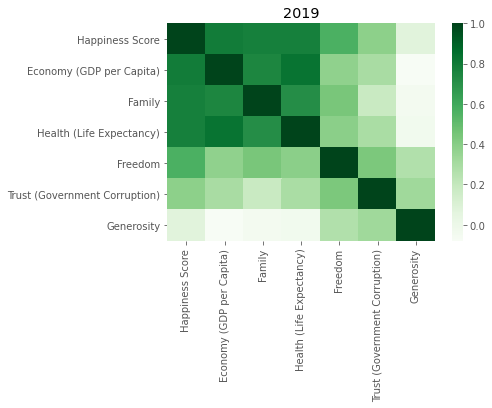

In [ ]:
sns.heatmap(dfhappiness[dfhappiness['Year']==2019].corr(),cmap="Greens")
plt.title('2019')

Text(0.5, 1.0, '2020')

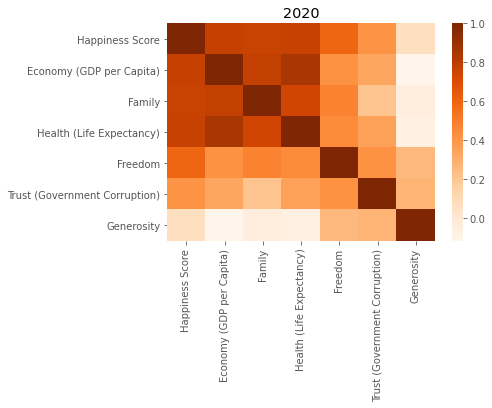

In [ ]:
sns.heatmap(dfhappiness[dfhappiness['Year']==2020].corr(),cmap="Oranges")
plt.title('2020')

Kesimpulan: tidak ada korelasi antara happiness score
dengan generosity score. Next question: Negara mana saja yang memiliki
generosity score yang besar?

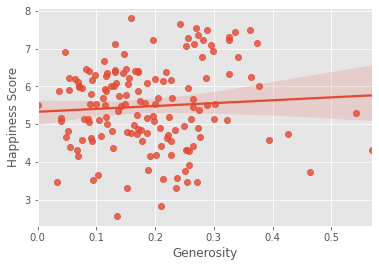

In [ ]:
sns.regplot(data = dfhappiness[dfhappiness['Year']==2020], x = 'Generosity', y = 'Happiness Score')

In [ ]:
def rand_color(num_color):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_color)]
    return color

In [ ]:
str(dfhappiness[dfhappiness['Year']==2015].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[4])+'th'

'74th'

Text(0.8, 0, '129th')

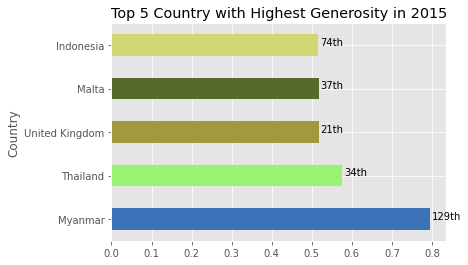

In [ ]:
dfhappiness[dfhappiness['Year']==2015].sort_values('Generosity',ascending=False)[0:5].plot(kind='barh',x='Country', y = 'Generosity', color=rand_color(5), title = 'Top 5 Country with Highest Generosity in 2015', legend=None)
plt.text(0.52,4,str(dfhappiness[dfhappiness['Year']==2015].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[4])+'th')
plt.text(0.52,3,str(dfhappiness[dfhappiness['Year']==2015].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[3])+'th')
plt.text(0.52,2,str(dfhappiness[dfhappiness['Year']==2015].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[2])+'th')
plt.text(0.58,1,str(dfhappiness[dfhappiness['Year']==2015].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[1])+'th')
plt.text(0.8,0,str(dfhappiness[dfhappiness['Year']==2015].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[0])+'th')

Text(0.82, 0, '119th')

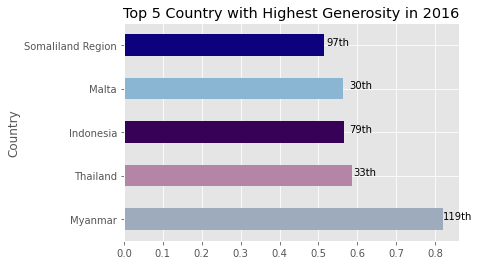

In [ ]:
dfhappiness[dfhappiness['Year']==2016].sort_values('Generosity',ascending=False)[0:5].plot(kind='barh',x='Country', y = 'Generosity', color=rand_color(5), title = 'Top 5 Country with Highest Generosity in 2016', legend=None)
plt.text(0.52,4,str(dfhappiness[dfhappiness['Year']==2016].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[4])+'th')
plt.text(0.58,3,str(dfhappiness[dfhappiness['Year']==2016].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[3])+'th')
plt.text(0.58,2,str(dfhappiness[dfhappiness['Year']==2016].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[2])+'th')
plt.text(0.59,1,str(dfhappiness[dfhappiness['Year']==2016].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[1])+'th')
plt.text(0.82,0,str(dfhappiness[dfhappiness['Year']==2016].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[0])+'th')

Text(0.85, 0, '114th')

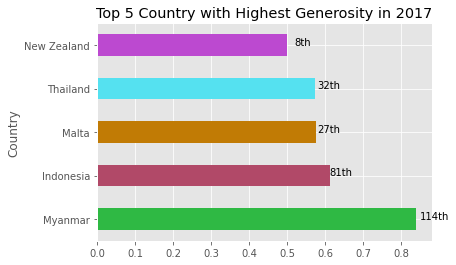

In [ ]:
dfhappiness[dfhappiness['Year']==2017].sort_values('Generosity',ascending=False)[0:5].plot(kind='barh',x='Country', y = 'Generosity', color=rand_color(5), title = 'Top 5 Country with Highest Generosity in 2017', legend=None)
plt.text(0.52,4,str(dfhappiness[dfhappiness['Year']==2017].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[4])+'th')
plt.text(0.58,3,str(dfhappiness[dfhappiness['Year']==2017].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[3])+'th')
plt.text(0.58,2,str(dfhappiness[dfhappiness['Year']==2017].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[2])+'th')
plt.text(0.61,1,str(dfhappiness[dfhappiness['Year']==2017].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[1])+'th')
plt.text(0.85,0,str(dfhappiness[dfhappiness['Year']==2017].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[0])+'th')

Text(0.6, 0, '130th')

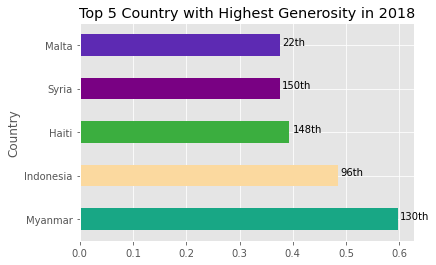

In [ ]:
dfhappiness[dfhappiness['Year']==2018].sort_values('Generosity',ascending=False)[0:5].plot(kind='barh',x='Country', y = 'Generosity', color=rand_color(5), title = 'Top 5 Country with Highest Generosity in 2018', legend=None)
plt.text(0.38,4,str(dfhappiness[dfhappiness['Year']==2018].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[4])+'th')
plt.text(0.38,3,str(dfhappiness[dfhappiness['Year']==2018].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[3])+'th')
plt.text(0.40,2,str(dfhappiness[dfhappiness['Year']==2018].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[2])+'th')
plt.text(0.49,1,str(dfhappiness[dfhappiness['Year']==2018].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[1])+'th')
plt.text(0.6,0,str(dfhappiness[dfhappiness['Year']==2018].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[0])+'th')

Text(0.58, 0, '131th')

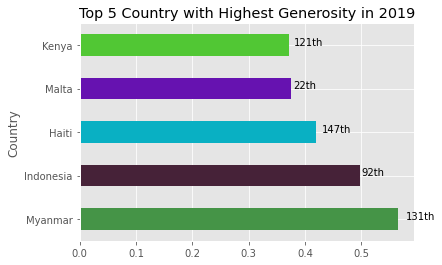

In [ ]:
dfhappiness[dfhappiness['Year']==2019].sort_values('Generosity',ascending=False)[0:5].plot(kind='barh',x='Country', y = 'Generosity', color=rand_color(5), title = 'Top 5 Country with Highest Generosity in 2019', legend=None)
plt.text(0.38,4,str(dfhappiness[dfhappiness['Year']==2019].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[4])+'th')
plt.text(0.38,3,str(dfhappiness[dfhappiness['Year']==2019].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[3])+'th')
plt.text(0.43,2,str(dfhappiness[dfhappiness['Year']==2019].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[2])+'th')
plt.text(0.5,1,str(dfhappiness[dfhappiness['Year']==2019].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[1])+'th')
plt.text(0.58,0,str(dfhappiness[dfhappiness['Year']==2019].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[0])+'th')

Text(0.58, 0, '133th')

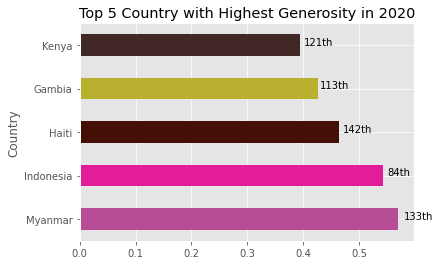

In [ ]:
dfhappiness[dfhappiness['Year']==2020].sort_values('Generosity',ascending=False)[0:5].plot(kind='barh',x='Country', y = 'Generosity', color=rand_color(5), title = 'Top 5 Country with Highest Generosity in 2020', legend=None)
plt.text(0.40,4,str(dfhappiness[dfhappiness['Year']==2020].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[4])+'th')
plt.text(0.43,3,str(dfhappiness[dfhappiness['Year']==2020].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[3])+'th')
plt.text(0.47,2,str(dfhappiness[dfhappiness['Year']==2020].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[2])+'th')
plt.text(0.55,1,str(dfhappiness[dfhappiness['Year']==2020].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[1])+'th')
plt.text(0.58,0,str(dfhappiness[dfhappiness['Year']==2020].sort_values('Generosity',ascending=False)[0:5]['Happiness Rank'].values[0])+'th')

Happiness Score dan Generosity Setiap Region

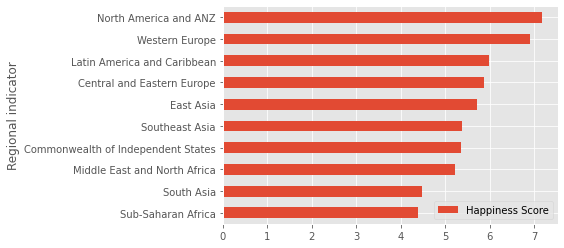

In [ ]:
dfhappiness2020.groupby('Regional indicator').mean().sort_values('Happiness Score').plot(kind='barh', y='Happiness Score')

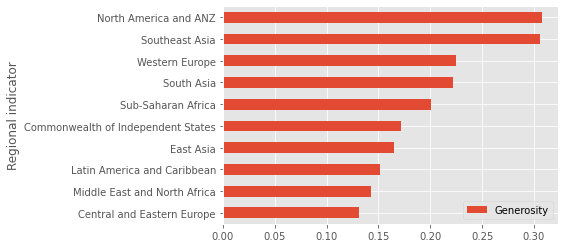

In [ ]:
dfhappiness2020.groupby('Regional indicator').mean().sort_values('Generosity').plot(kind='barh', y='Generosity')

Pertanyaan 3: Apakah ada korelasi antara peringkat edukasi dengan happiness score?

In [5]:
dfhappiness2020.head()

,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia + residual,Happiness Rank,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5,2020


In [ ]:
dfhappiness2020_1 = dfhappiness2020.set_index('Country')
dfhappiness2020_1.head()

In [9]:
dfeducation = pd.read_csv('https://raw.githubusercontent.com/andreanstev/BedahData/main/World%20Happiness%20Report%202015-2020/educationrankbycountry.csv') #65 Negara Teratas di Edukasi

In [10]:
dfeducation = dfeducation.set_index('country')

In [13]:
#dfhappiness2020_2 = dataset happiness index yang sudah digabungkan dengan education score
dfhappiness2020_2 = pd.concat([dfhappiness2020_1,dfeducation], axis = 1)

In [14]:
null_index = dfhappiness2020_2[dfhappiness2020_2['Regional indicator'].isnull() == True].index

In [15]:
dfhappiness2020_2.fillna(0, inplace = True)

In [16]:
dfhappiness2020_2.drop(['readingScore','mathScore','scienceScore','upperwhisker','lowerwhisker'], axis = 1, inplace=True)

In [17]:
dfhappiness2020_2.rename(columns={'totalScore':'educationScore'},inplace=True)

In [18]:
dfhappiness2020_2.head()

,Regional indicator,Happiness Score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia + residual,Happiness Rank,Year,educationScore
Finland,Western Europe,7.8087,0.031156,10.639267,0.954330,71.900825,0.949172,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1.0,2020.0,1631.0
Denmark,Western Europe,7.6456,0.033492,10.774001,0.955991,72.402504,0.951444,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2.0,2020.0,1497.0
Switzerland,Western Europe,7.5599,0.035014,10.979933,0.942847,74.102448,0.921337,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3.0,2020.0,1552.0
Iceland,Western Europe,7.5045,0.059616,10.772559,0.974670,73.000000,0.948892,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4.0,2020.0,1503.0
Norway,Western Europe,7.4880,0.034837,11.087804,0.952487,73.200783,0.955750,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5.0,2020.0,1501.0


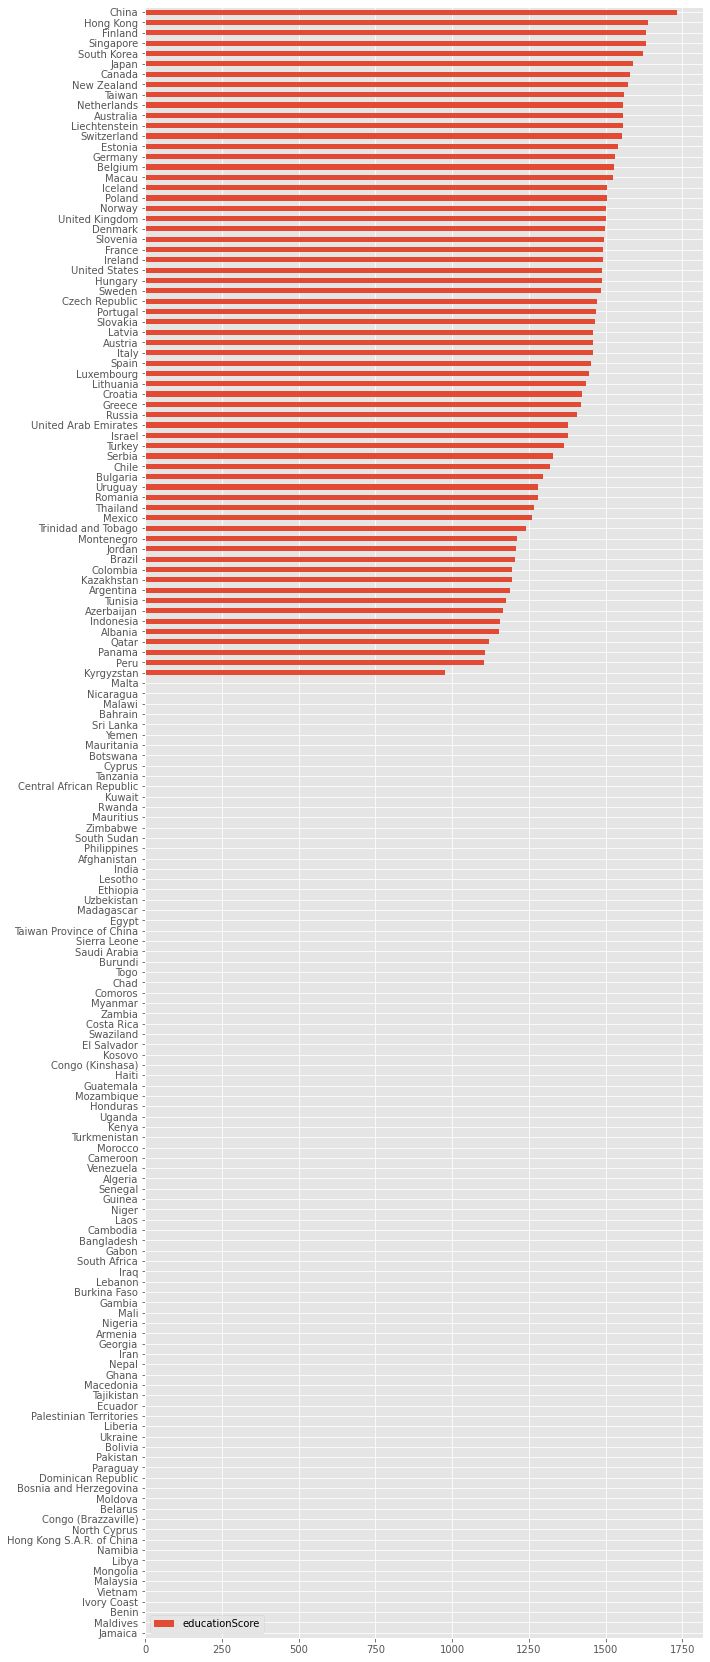

In [21]:
dfhappiness2020_2.sort_values('educationScore').plot(kind = 'barh', y = 'educationScore', figsize= (10,30))

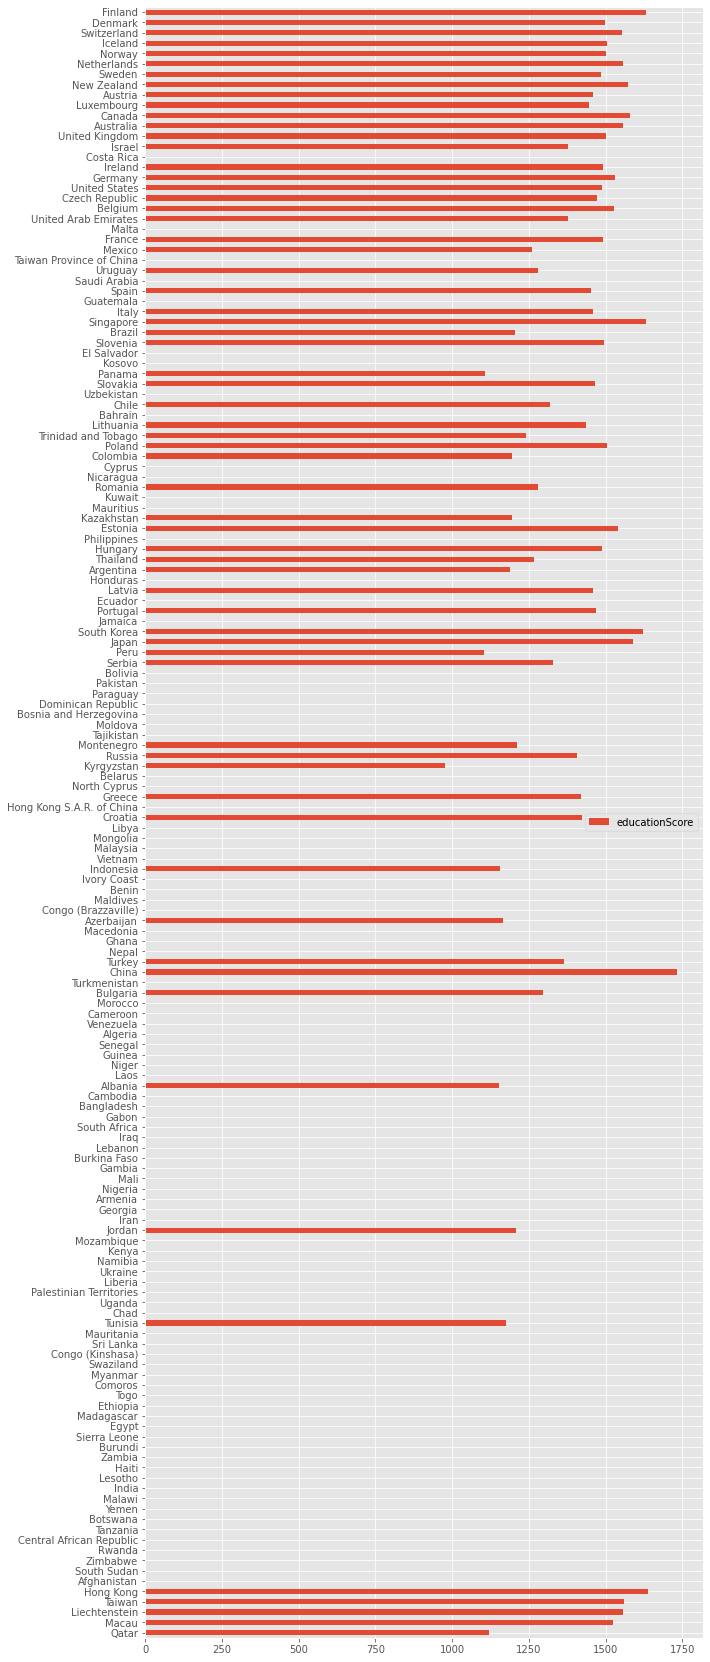

In [24]:
dfhappiness2020_2.plot(kind = 'barh', y = 'educationScore', figsize= (10,30)).invert_yaxis()

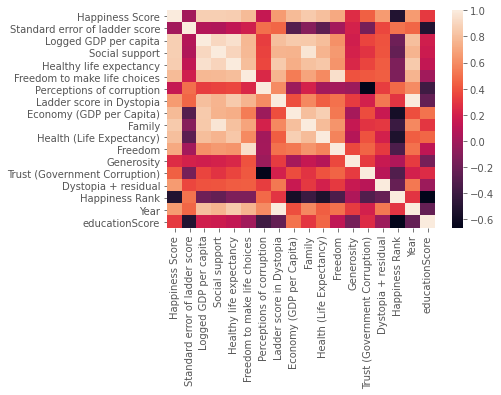

In [25]:
sns.heatmap(dfhappiness2020_2.corr())

In [43]:
#dfhappiness2020_3 = dataset happiness index berisi 60 negara yang memiliki education score
dfhappiness2020_3 = dfhappiness2020_2.drop(dfhappiness2020_2[dfhappiness2020_2['educationScore']==0].index, axis=0)

In [ ]:
dfhappiness2020_3

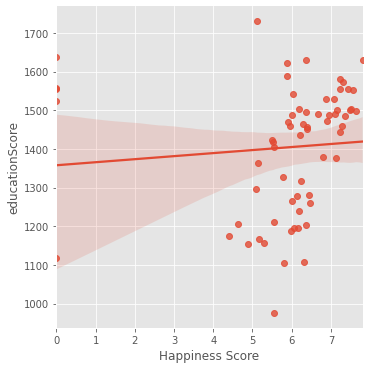

In [37]:
sns.lmplot(x= 'Happiness Score', y='educationScore', data = dfhappiness2020_3)

Linear regression plot menunjukkan bahwa kedua variabel tidak memiliki korelasi, diakibatkan oleh outliers.

In [45]:
#dfhappiness2020_4 = dfhappiness2020_3 yang outliersnya telah di drop
dfhappiness2020_4 = dfhappiness2020_3.drop(dfhappiness2020_3[dfhappiness2020_3['Happiness Score']<4].index, axis=0)

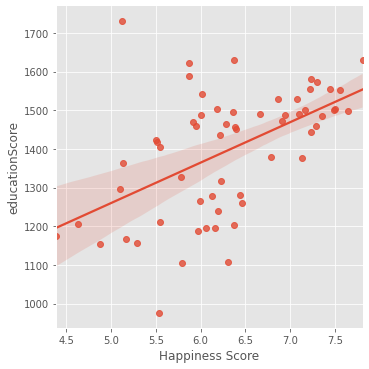

In [46]:
sns.lmplot(x= 'Happiness Score', y='educationScore', data = dfhappiness2020_4)

In [47]:
#Dari plot diatas dapat dilihat bahwa negara yang happiness scorenya diatas 6.5 korelasinya cukup besar
dfhappiness2020_3[dfhappiness2020_3['Happiness Score']>6.5]

,Regional indicator,Happiness Score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia + residual,Happiness Rank,Year,educationScore
Finland,Western Europe,7.8087,0.031156,10.639267,0.954330,71.900825,0.949172,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1.0,2020.0,1631.0
Denmark,Western Europe,7.6456,0.033492,10.774001,0.955991,72.402504,0.951444,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2.0,2020.0,1497.0
Switzerland,Western Europe,7.5599,0.035014,10.979933,0.942847,74.102448,0.921337,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3.0,2020.0,1552.0
Iceland,Western Europe,7.5045,0.059616,10.772559,0.974670,73.000000,0.948892,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4.0,2020.0,1503.0
Norway,Western Europe,7.4880,0.034837,11.087804,0.952487,73.200783,0.955750,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5.0,2020.0,1501.0
Netherlands,Western Europe,7.4489,0.027792,10.812712,0.939139,72.300919,0.908548,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117,6.0,2020.0,1556.0
Sweden,Western Europe,7.3535,0.036234,10.758794,0.926311,72.600769,0.939144,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299,7.0,2020.0,1486.0
New Zealand,North America and ANZ,7.2996,0.039465,10.500943,0.949119,73.202629,0.936217,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108,8.0,2020.0,1572.0
Austria,Western Europe,7.2942,0.033365,10.742824,0.928046,73.002502,0.899989,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446,9.0,2020.0,1460.0
Luxembourg,Western Europe,7.2375,0.030852,11.450681,0.906912,72.599998,0.905636,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700,10.0,2020.0,1445.0


In [35]:
dfhappiness2020_3[dfhappiness2020_3['Happiness Score']>6.5]['Regional indicator'].value_counts()

Western Europe                  14
North America and ANZ            4
Middle East and North Africa     2
Central and Eastern Europe       1
Name: Regional indicator, dtype: int64

Kesimpulan: Negara-negara di Eropa Barat, Amerika bagian Utara, Australia, dan New Zealand tingkat korelasi antara happiness score dengan ranking edukasi nya cukup besar.